# Feature Selection for Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = None


Lets load the cleaned data for further processing of data in order to make it suitable for price prediction

In [2]:
data = pd.read_csv('cleaned_listings_montreal.csv',low_memory=False)

In [3]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2078,https://www.airbnb.com/rooms/2078,20190813195408,2019-08-14,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...,Centrally located clean comfy furnished room ...,Centrally located in trendy Le Plateau. Join...,none,Although my place is centrally located in Le P...,I always inform my guests the places/attractio...,I am 6-8 mins. walk to Metro Laurie and bus ro...,You will have full access in the apartment. I...,I am always available to help and give informa...,No house rules but I expect my guests to follo...,https://a0.muscache.com/im/pictures/88170231/0...,2277,https://www.airbnb.com/users/show/2277,Nelia,2008-08-19,"Montreal, Québec, Canada","Honest, quiet and adhere to the golden rules a...",NaN,NaN,f,https://a0.muscache.com/im/users/2277/profile_...,https://a0.muscache.com/im/users/2277/profile_...,Le Plateau,1.0,1.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Montreal, QC, Canada",Le Plateau,Le Plateau-Mont-Royal,Montreal,QC,H2J 3E9,Montreal,"Montreal, Canada",CA,Canada,45.53069,-73.58588,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",38.0,0.0,0.0,1,$6.00,2,7,2,2,7,7,2.0,7.0,7 months ago,0,0,0,225,2019-08-14,245,4,2011-09-06,2018-09-23,93.0,10.0,9.0,10.0,10.0,10.0,10.0,"{Quebec,"" CA""}",t,flexible,f,f,1,0,1,0,2.53
1,2843,https://www.airbnb.com/rooms/2843,20190813195408,2019-08-14,Fabulous downtown/airport room,Come stay in this trendy area of downtown Mont...,"Private individual room in the downtown area, ...",Come stay in this trendy area of downtown Mont...,none,This area of St Henri is actually downtown Mon...,From this room you can walk to downtown Montre...,There is a major metro/subway stop called Lion...,"The guests can use the kitchen anytime, fully ...",I meet guests when they arrive show them the h...,No smoking and no pets Airport bus stops acros...,https://a0.muscache.com/im/pictures/89b0268d-2...,2319,https://www.airbnb.com/users/show/2319,Gail,2008-08-19,"Montreal, Québec, Canada",Manage a network of downtown rooms and private...,within an hour,100%,f,https://a0.muscache.com/im/pictures/user/7c04e...,https://a0.muscache.com/im/pictures/user/7c04e...,Little Burgundy,6.0,6.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Montréal, Québec, Canada",Le Sud-Ouest,Le Sud-Ouest,Montréal,Québec,H3J 2K3,Montreal,"Montréal, Canada",CA,Canada,45.48442,-73.57923,t,Serviced apartment,Private room,2,1.

Dropping the columns that are non-relevant to our prediction problem or has text-data

In [4]:
df = data.drop([ 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 
                'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 
                'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_location',
                'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_total_listings_count', 
                'host_verifications', 'host_has_profile_pic', 'street', 'neighbourhood', 'city', 'state', 
                'zipcode', 'market', 'smart_location', 'country_code', 'country', 'extra_people', 'maximum_nights',
                'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'first_review', 'last_review', 'calendar_updated', 
                'calendar_last_scraped', 'jurisdiction_names', 'calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms'],axis=1)

In [5]:
df.head(5)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2008-08-19,NaN,NaN,f,1.0,t,Le Plateau-Mont-Royal,45.53069,-73.58588,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",38.0,0.0,0.0,1,2,0,0,0,225,245,4,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,flexible,f,f,2.53
1,2008-08-19,within an hour,100%,f,6.0,t,Le Sud-Ouest,45.48442,-73.57923,t,Serviced apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",30.0,134.0,20.0,1,1,6,6,6,255,132,23,87.0,9.0,9.0,9.0,10.0,10.0,10.0,t,moderate,f,f,1.07
2,2009-11-25,within a few hours,100%,t,1.0,t,Le Plateau-Mont-Royal,45.54135,-73.57814,f,Loft,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",175.0,200.0,0.0,2,3,5,25,47,322,160,31,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,1.60
3,2010-05-14,within an hour,100%,f,3.0,t,Ville-Marie,45.51888,-73.56546,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",94.0,NaN,65.0,2,3,7,22,39,314,302,51,94.0,10.0,9.0,10.0,10.0,10.0,10.0,f,moderate,f,f,2.71
4,2010-05-14,within an hour,100%,f,3.0,t,Ville-Marie,45.52020,-73.56422,t,House,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Heating,""Family/ki...",146.0,NaN,100.0,2,3,21,51,81,356,53,10,92.0,10.0,9.0,10.0,10.0,10.0,9.0,t,moderate,f,f,0.58


In [6]:
df.shape

(21156, 41)

Left with 21157 records and 41 features

Looking into the missing values or Nan values

In [7]:
df.isnull().sum()

host_since                             7
host_response_time                  6696
host_response_rate                  6696
host_is_superhost                      7
host_listings_count                    7
host_identity_verified                 7
neighbourhood_cleansed                 0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             32
bedrooms                               9
beds                                  25
bed_type                               0
amenities                              0
price                                  0
security_deposit                    7165
cleaning_fee                        5028
guests_included                        0
minimum_nights                         0
availability_30                        0
availability_60 

Lets look into null values in reviews

In [8]:
df[df['reviews_per_month'].isnull()].head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
26,2011-01-02,NaN,NaN,f,1.0,f,Montréal-Ouest,45.45372,-73.65060,t,House,Private room,2,NaN,1.0,1.0,Real Bed,"{Wifi,""Family/kid friendly""}",150.0,NaN,NaN,1,3,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,f,f,NaN
38,2011-04-04,NaN,NaN,f,1.0,t,Rosemont-La Petite-Patrie,45.53751,-73.61046,t,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",He...",64.0,NaN,NaN,1,21,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible,f,f,NaN
41,2010-07-20,within a few hours,100%,f,4.0,t,Rosemont-La Petite-Patrie,45.54553,-73.55758,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",41.0,0.0,50.0,1,31,0,0,0,235,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,f,f,NaN
56,2011-06-07,NaN,NaN,f,1.0,f,Ville-Marie,45.49634,-73.58078,t,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",265.0,NaN,NaN,1,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
78,2011-07-14,within an hour,100%,f,4.0,f,Côte-des-Neiges-Notre-Dame-de-Grâce,45.49329,-73.62615,t,Apartment,Entire home/apt,5,2.5,4.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200.0,2016.0,300.0,4,31,12,42,72,347,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,f,f,NaN


It seems that listings that have zero reviews have NaN values for their review measures
So, we can set those measures to 0 whenever we have zero number of reviews

In [9]:
mask_cols = ['review_scores_accuracy','review_scores_rating','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
df.loc[df.number_of_reviews == 0,mask_cols]=0

In [10]:
df.isnull().sum()

host_since                             7
host_response_time                  6696
host_response_rate                  6696
host_is_superhost                      7
host_listings_count                    7
host_identity_verified                 7
neighbourhood_cleansed                 0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             32
bedrooms                               9
beds                                  25
bed_type                               0
amenities                              0
price                                  0
security_deposit                    7165
cleaning_fee                        5028
guests_included                        0
minimum_nights                         0
availability_30                        0
availability_60 

But, we can see that review measures still have some null values. So, it may happen that there are reviews but no one has reviewed that particular  review measure.
So, we can set such review measures as 0 too.

In [11]:
mask_cols_dict = {'review_scores_rating':0,'review_scores_accuracy':0,'review_scores_cleanliness':0,'review_scores_cleanliness':0,'review_scores_checkin':0,'review_scores_communication':0,'review_scores_location':0,'review_scores_value':0}
df= df.fillna(mask_cols_dict)


Since, we have handled the missing data in reviews, we look for other features with missing values.

There are just 2 instances where host_is_superhost is missing, we can drop those rows

In [12]:
df = df.dropna(subset=['host_is_superhost'])


Moreover, we can also set cleaning_fee and security_deposit to 0, wherever its missing

In [13]:
df.cleaning_fee.fillna(0,inplace=True)
df.security_deposit.fillna(0,inplace=True)

In [14]:
df[df['bathrooms'].isnull()].head(5)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
10,2010-07-27,NaN,NaN,f,5.0,f,Mercier-Hochelaga-Maisonneuve,45.54571,-73.53853,t,Apartment,Entire home/apt,6,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Heating,""Family/ki...",37.0,0.0,0.0,4,30,0,0,0,225,16,0,91.0,8.0,8.0,9.0,9.0,7.0,9.0,f,strict_14_with_grace_period,f,f,0.15
20,2010-11-19,NaN,NaN,f,1.0,t,Le Plateau-Mont-Royal,45.52926,-73.58616,t,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Cat...",34.0,0.0,15.0,1,1,0,0,0,0,92,0,98.0,10.0,9.0,10.0,10.0,10.0,10.0,f,moderate,t,t,0.99
26,2011-01-02,NaN,NaN,f,1.0,f,Montréal-Ouest,45.45372,-73.65060,t,House,Private room,2,NaN,1.0,1.0,Real Bed,"{Wifi,""Family/kid friendly""}",150.0,0.0,0.0,1,3,30,60,90,365,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,strict_14_with_grace_period,f,f,0.00
39,2009-08-04,within an hour,100%,f,2.0,f,Côte-des-Neiges-Notre-Dame-de-Grâce,45.48705,-73.61831,t,Apartment,Entire home/apt,3,NaN,1.0,2.0,Real Bed,"{""Cable TV"",Internet,Wifi,Kitchen,""Free street...",60.0,246.0,45.0,2,3,0,0,0,224,88,10,95.0,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,0.89
56,2011-06-07,NaN,NaN,f,1.0,f,Ville-Marie,45.49634,-73.58078,t,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",265.0,0.0,0.0,1,1,30,60,90,365,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,flexible,f,f,0.00


We can see that bedroom value is null for private rooms, entrire apt, which doesnt make sense. Imputing 0 wont make sense either. So, since the NaN values are less in number, we can safely drop those rows

In [15]:
df.dropna(subset=['beds','bedrooms','bathrooms'],inplace=True)

Looking into the cancellation_policy feature

In [16]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    8133
flexible                       7426
moderate                       5515
super_strict_60                  18
super_strict_30                   1
Name: cancellation_policy, dtype: int64

We can se that 'strict_14' is the mode for this column, median would be 'moderate', or we can drop those rows as they are just 2! 

In [17]:
df.dropna(subset=['cancellation_policy'],inplace=True)

Checking host_response_time and host_response_rate features
As they have lot many null values, dropping rows for such many null values isnt a good choice, we can drop those two columns altogether

In [18]:
df.drop(['host_response_time','host_response_rate'],axis=1,inplace=True)

In [19]:
df.isnull().sum()

host_since                          0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
neighbourhood_cleansed              0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
minimum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_reviews                   0
number_of_re

No null values in our data now!

In [20]:
df.shape

(21093, 39)

Left with 21092 samples and 39 features

# Feature Selection

Lets look how correlated our numerical features are to each other and our target variable

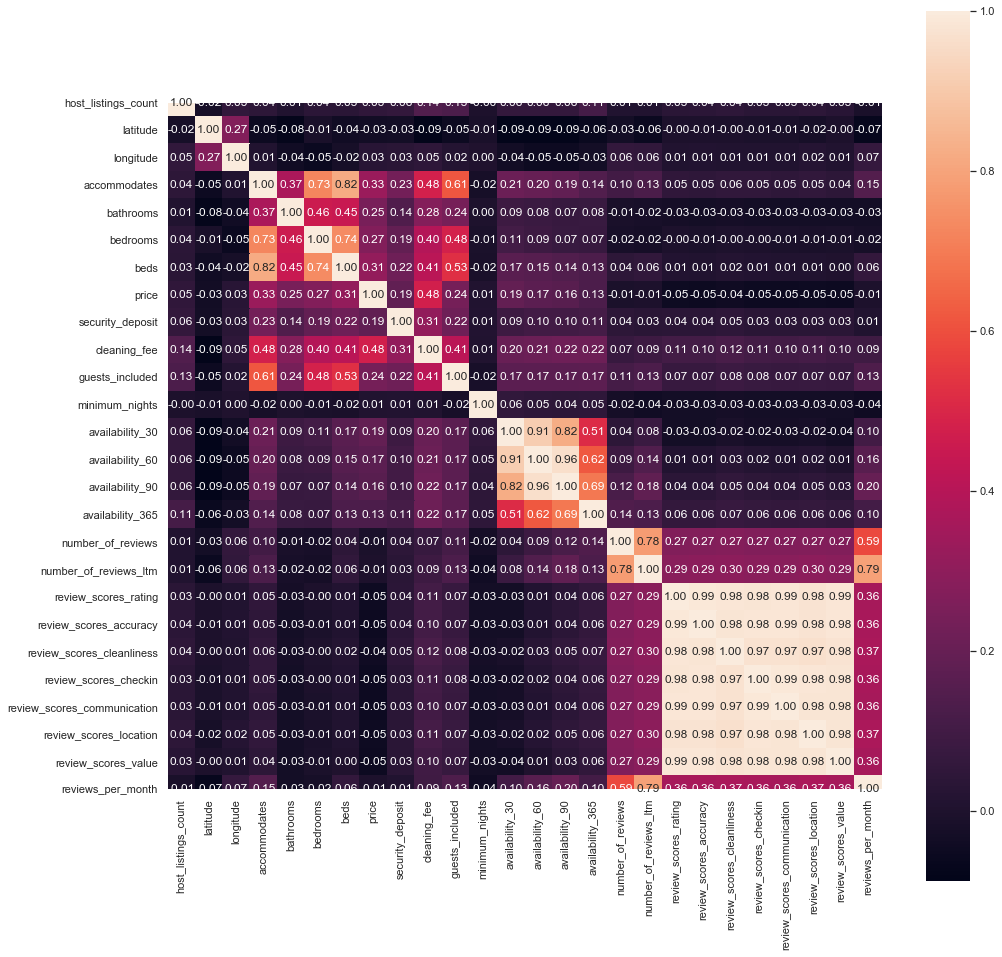

In [21]:
corr = df.corr()
plt.figure(figsize = (16,16))
sns.set(font_scale=1)
sns.heatmap(corr,cbar = True, annot=True, square = True, fmt = '.2f',xticklabels=corr.columns, yticklabels=corr.columns) 
plt.show()

We can see the following correlations: <br>
bedrooms,beds, guests_included with accomodates <br>
beds, accomodates with bedrooms<br>
bedrooms, accomodates with beds<br>
guests_included with accomodates<br>
among availibilty_60,availibilty_90 and availability_30<br>
availbilty_90 with availibilty_365 <br>
number_of_reviews with number_of_reviews_ltm<br>
among review_scores<br>


In [22]:
df.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'reviews_per_month'],
      dtype='object')

Above are the features considered for price prediction

In [23]:
df.astype('object').describe(include='all').loc['unique', :]

host_since                           3080
host_is_superhost                       2
host_listings_count                    56
host_identity_verified                  2
neighbourhood_cleansed                 32
latitude                             9226
longitude                            9085
is_location_exact                       2
property_type                          30
room_type                               3
accommodates                           17
bathrooms                              19
bedrooms                               16
beds                                   24
bed_type                                5
amenities                           19346
price                                 436
security_deposit                      224
cleaning_fee                          204
guests_included                        17
minimum_nights                         95
availability_30                        31
availability_60                        61
availability_90                   

Now lets convert the t,f values of some features into 0,1 <br>
Those features are  : host_is_superhost, host_identity_verified, is_location_exact, instant_bookable, require_guest_profile_picture, require_guest_phone_verification

In [24]:
cols = ['host_is_superhost','host_identity_verified','is_location_exact','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
df[cols] = df[cols].replace(('t', 'f'), (1, 0))

Now converting the host_since date to give the number of days

In [25]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since'] = pd.Series( (pd.Timestamp('2019-11-21') -df['host_since']).dt.days )

Dropping the latitude and longitude

In [26]:
#df.drop(['latitude','longitude'],axis=1,inplace=True)

In [27]:
df_lat_long = df[['latitude','longitude']]


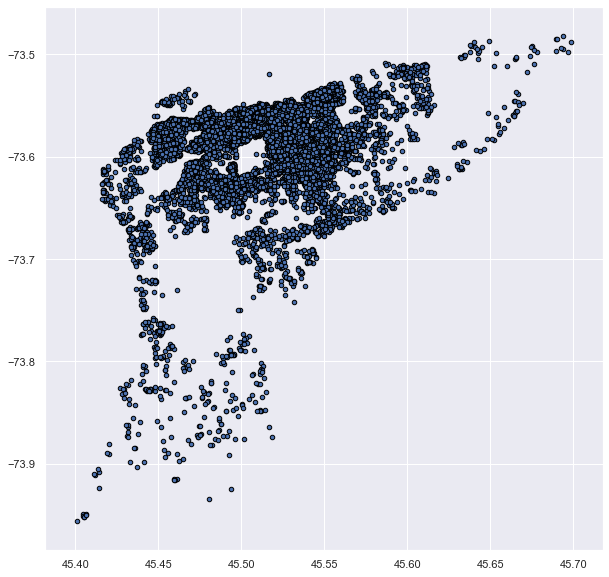

In [28]:
# plot
plt.figure(figsize=(10,10))
plt.scatter( df_lat_long.iloc[:, 0], df_lat_long.iloc[:, 1], marker='o',edgecolor='black', s=20)
plt.show()



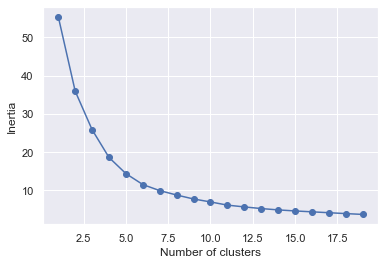

In [29]:
inertias = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, init='random',n_init=10,random_state=0)
    km.fit(df_lat_long)
    inertias.append(km.inertia_)

plt.plot(range(1, 20), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

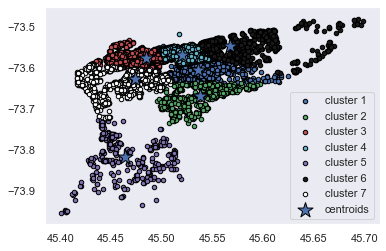

In [30]:
X= np.array(df_lat_long)
n_clusters=7

km = KMeans(n_clusters=7, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=2)
y_km = km.fit_predict(df_lat_long)


from itertools import cycle
cycol = cycle('bgrcmkw')


for c in range(0,n_clusters) :
    plt.scatter(
    X[y_km == c, 0], X[y_km == c, 1],
    s=20, c=next(cycol),
    edgecolor='black',
    label='cluster '+str(c+1)
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()



In [31]:
neighbourhood_labels = ['Neighbourhood_'+str(x) for x in km.labels_]

In [32]:
df_lat_long = df_lat_long.assign(neighbourhood=neighbourhood_labels)

In [33]:
df=df.assign(neighbourhood=df_lat_long.neighbourhood)

In [34]:
df.drop(['neighbourhood_cleansed','latitude','longitude'],axis=1,inplace=True)

In [35]:
df.head()

,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,neighbourhood
0,4111,0,1.0,1,1,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",38.0,0.0,0.0,1,2,0,0,0,225,245,4,93.0,10.0,9.0,10.0,10.0,10.0,10.0,1,flexible,0,0,2.53,Neighbourhood_3
1,4111,0,6.0,1,1,Serviced apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",30.0,134.0,20.0,1,1,6,6,6,255,132,23,87.0,9.0,9.0,9.0,10.0,10.0,10.0,1,moderate,0,0,1.07,Neighbourhood_2
2,3648,1,1.0,1,0,Loft,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",175.0,200.0,0.0,2,3,5,25,47,322,160,31,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0,0,1.60,Neighbourhood_3
3,3478,0,3.0,1,1,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",94.0,0.0,65.0,2,3,7,22,39,314,302,51,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0,moderate,0,0,2.71,Neighbourhood_3
4,3478,0,3.0,1,1,House,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Heating,""Family/ki...",146.0,0.0,100.0,2,3,21,51,81,356,53,10,92.0,10.0,9.0,10.0,10.0,10.0,9.0,1,moderate,0,0,0.58,Neighbourhood_3


Grouping the amenities and creating another feature for each amenity group present

In [36]:
df['amenities']=df.amenities.str.replace('[{}]',"").str.replace('"',"")

amenity_dict = {'Basics': ['wifi','Wifi','TV','tv'], 'Facilities': ['Hot tub','Gym','Pool','Air conditioning'] , 'Parking':['Free street parking','Outdoor Parking','Paid parking off premises','Free parking on premises'], 'Location':['Beachfront','Waterfront','Ski-in/Ski-out'] , 'Safety features':['Carbon monoxide detector']}
df.amenities = df.amenities.apply(lambda x: x[0:-1].split(','))

for keys in amenity_dict:
    print(keys)
    df[keys] = df.amenities.apply(lambda x : int(any(elem in x for elem in amenity_dict[keys])))
    print(df[keys].value_counts())

Basics
1    20722
0      371
Name: Basics, dtype: int64
Facilities
1    11386
0     9707
Name: Facilities, dtype: int64
Parking
1    11306
0     9787
Name: Parking, dtype: int64
Location
0    21012
1       81
Name: Location, dtype: int64
Safety features
0    13106
1     7987
Name: Safety features, dtype: int64


In [37]:
df.drop('amenities',axis=1,inplace=True)

Taking care of categorical features

In [38]:
df.room_type.value_counts()

Entire home/apt    15017
Private room        5900
Shared room          176
Name: room_type, dtype: int64

Converting room type to ordinal data

In [39]:
room_type_to_ordinal = {"Entire home/apt": 3, "Private room": 2, "Shared room" : 1 }
df.room_type.replace(room_type_to_ordinal,inplace=True)

In [40]:
df.head()

,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,neighbourhood,Basics,Facilities,Parking,Location,Safety features
0,4111,0,1.0,1,1,House,2,2,1.0,1.0,1.0,Real Bed,38.0,0.0,0.0,1,2,0,0,0,225,245,4,93.0,10.0,9.0,10.0,10.0,10.0,10.0,1,flexible,0,0,2.53,Neighbourhood_3,1,0,1,0,0
1,4111,0,6.0,1,1,Serviced apartment,2,2,1.0,1.0,1.0,Real Bed,30.0,134.0,20.0,1,1,6,6,6,255,132,23,87.0,9.0,9.0,9.0,10.0,10.0,10.0,1,moderate,0,0,1.07,Neighbourhood_2,1,1,1,0,0
2,3648,1,1.0,1,0,Loft,3,4,1.0,1.0,1.0,Real Bed,175.0,200.0,0.0,2,3,5,25,47,322,160,31,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0,0,1.60,Neighbourhood_3,1,1,1,0,1
3,3478,0,3.0,1,1,Apartment,3,4,1.0,1.0,2.0,Real Bed,94.0,0.0,65.0,2,3,7,22,39,314,302,51,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0,moderate,0,0,2.71,Neighbourhood_3,1,0,1,0,1
4,3478,0,3.0,1,1,House,3,5,1.0,2.0,2.0,Real Bed,146.0,0.0,100.0,2,3,21,51,81,356,53,10,92.0,10.0,9.0,10.0,10.0,10.0,9.0,1,moderate,0,0,0.58,Neighbourhood_3,1,0,0,0,1


In [41]:
df.shape

(21093, 41)

In [42]:
df.property_type.value_counts()

Apartment             15740
Condominium            1838
House                  1279
Loft                    844
Townhouse               493
Serviced apartment      268
Bed and breakfast       135
Bungalow                 76
Guest suite              67
Guesthouse               58
Hostel                   56
Aparthotel               54
Boutique hotel           47
Other                    44
Villa                    28
Cottage                  24
Cabin                     7
Camper/RV                 5
Earth house               4
Tiny house                4
Boat                      4
Nature lodge              3
Hotel                     3
Castle                    3
Tent                      2
Chalet                    2
Cave                      2
Campsite                  1
Farm stay                 1
Houseboat                 1
Name: property_type, dtype: int64

In [43]:
stay_type_dict = {'basic_stay' : ['Aparthotel','Guesthouse','Apartment', 'Loft',
                                  'Serviced apartment', 'Guest suite','Bed and breakfast','Hostel'],
                  'luxury_stay' : ['Condominium','Boutique hotel', 'House','Townhouse','Villa', 'Bungalow','Hotel'] , 
                  'unique_stay': ['Other','Cottage',
                                  'Cabin' , 'Camper/RV','Earth house','Boat' , 
                                  'Tiny house', 'Nature lodge',  'Castle'  , 
                                  'Chalet' , 'Cave', 'Tent'  ,  'Campsite' ,  
                                  'Farm stay', 'Houseboat'] }

In [44]:
for keys in stay_type_dict:
    print(keys)
    df[keys] = df.property_type.apply(lambda x : int(any(elem in x for elem in stay_type_dict[keys])))
    print(df[keys].value_counts())

basic_stay
1    17222
0     3871
Name: basic_stay, dtype: int64
luxury_stay
0    17328
1     3765
Name: luxury_stay, dtype: int64
unique_stay
0    20986
1      107
Name: unique_stay, dtype: int64


In [45]:
df.head()

,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,neighbourhood,Basics,Facilities,Parking,Location,Safety features,basic_stay,luxury_stay,unique_stay
0,4111,0,1.0,1,1,House,2,2,1.0,1.0,1.0,Real Bed,38.0,0.0,0.0,1,2,0,0,0,225,245,4,93.0,10.0,9.0,10.0,10.0,10.0,10.0,1,flexible,0,0,2.53,Neighbourhood_3,1,0,1,0,0,0,1,0
1,4111,0,6.0,1,1,Serviced apartment,2,2,1.0,1.0,1.0,Real Bed,30.0,134.0,20.0,1,1,6,6,6,255,132,23,87.0,9.0,9.0,9.0,10.0,10.0,10.0,1,moderate,0,0,1.07,Neighbourhood_2,1,1,1,0,0,1,0,0
2,3648,1,1.0,1,0,Loft,3,4,1.0,1.0,1.0,Real Bed,175.0,200.0,0.0,2,3,5,25,47,322,160,31,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0,0,1.60,Neighbourhood_3,1,1,1,0,1,1,0,0
3,3478,0,3.0,1,1,Apartment,3,4,1.0,1.0,2.0,Real Bed,94.0,0.0,65.0,2,3,7,22,39,314,302,51,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0,moderate,0,0,2.71,Neighbourhood_3,1,0,1,0,1,1,0,0
4,3478,0,3.0,1,1,House,3,5,1.0,2.0,2.0,Real Bed,146.0,0.0,100.0,2,3,21,51,81,356,53,10,92.0,10.0,9.0,10.0,10.0,10.0,9.0,1,moderate,0,0,0.58,Neighbourhood_3,1,0,0,0,1,0,1,0


In [46]:
df.drop('property_type',axis=1,inplace=True)

In [47]:
bed_type_to_ordinal = {"Real Bed": 3, "Futon": 2, "Pull-out Sofa" : 2,"Couch":1,"Airbed":1}
df.bed_type.replace(bed_type_to_ordinal,inplace=True)

In [48]:
cat_features = ['neighbourhood','cancellation_policy']

In [49]:
one_hot = pd.get_dummies(df['cancellation_policy'])
# Drop column B as it is now encoded
#df = df.drop('cancellation_policy',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [50]:
one_hot = pd.get_dummies(df['neighbourhood'])
# Drop column B as it is now encoded
#df = df.drop('neighbourhood_cleansed',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [51]:
df.shape

(21093, 55)

In [52]:
df_cat = df.copy()


In [53]:
df = df.drop(cat_features, axis=1)

In [54]:
df.head()

,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Basics,Facilities,Parking,Location,Safety features,basic_stay,luxury_stay,unique_stay,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60,Neighbourhood_0,Neighbourhood_1,Neighbourhood_2,Neighbourhood_3,Neighbourhood_4,Neighbourhood_5,Neighbourhood_6
0,4111,0,1.0,1,1,2,2,1.0,1.0,1.0,3,38.0,0.0,0.0,1,2,0,0,0,225,245,4,93.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0,0,2.53,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,4111,0,6.0,1,1,2,2,1.0,1.0,1.0,3,30.0,134.0,20.0,1,1,6,6,6,255,132,23,87.0,9.0,9.0,9.0,10.0,10.0,10.0,1,0,0,1.07,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,3648,1,1.0,1,0,3,4,1.0,1.0,1.0,3,175.0,200.0,0.0,2,3,5,25,47,322,160,31,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1.60,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,3478,0,3.0,1,1,3,4,1.0,1.0,2.0,3,94.0,0.0,65.0,2,3,7,22,39,314,302,51,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0,0,2.71,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,3478,0,3.0,1,1,3,5,1.0,2.0,2.0,3,146.0,0.0,100.0,2,3,21,51,81,356,53,10,92.0,10.0,9.0,10.0,10.0,10.0,9.0,1,0,0,0.58,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


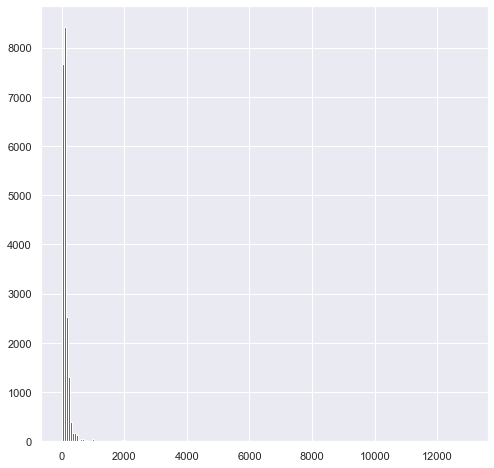

In [55]:
plt.figure(figsize=(8,8))
plt.hist(df['price'],bins=200)
plt.show()

count    21093.000000
mean       116.550751
std        213.982539
min          0.000000
25%         50.000000
50%         79.000000
75%        124.000000
max      12961.000000
Name: price, dtype: float64

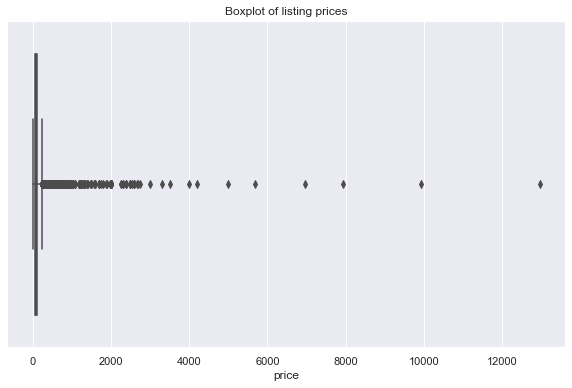

In [56]:

%matplotlib inline

plt.figure(figsize=(10, 6))
sns.boxplot(df['price'])
plt.title('Boxplot of listing prices');

df.price.describe()


Most of the values of prices between 0 -1500 so we take 700 has our threshold for outlier
checking 

In [57]:

pd.Series(df['price']<=700).value_counts()


True     20882
False      211
Name: price, dtype: int64

In [58]:
df.to_csv('processed_classification_data_montreal.csv',header=True,index=False)

In [59]:
number_outlier = len(df[df['price'] > 700])
price_outlier = len(df[df['price'] > 700]) / df.shape[0] * 100
print('There are {} instances of outlier in the price column. They make {:.2} % of the whole column.'.format(number_outlier, price_outlier))

There are 211 instances of outlier in the price column. They make 1.0 % of the whole column.


In [60]:
df_700 = df[df['price'] <= 700]

In [61]:
df_700.to_csv('price_prediction_data_montreal_700.csv',header=True,index=False)

In [62]:

pd.Series(df['price']<=500).value_counts()


True     20765
False      328
Name: price, dtype: int64

In [63]:
number_outlier = len(df[df['price'] > 500])
price_outlier = len(df[df['price'] > 500]) / df.shape[0] * 100
print('There are {} instances of outlier in the price column. They make {:.2} % of the whole column.'.format(number_outlier, price_outlier))

There are 328 instances of outlier in the price column. They make 1.6 % of the whole column.


In [64]:
df_500 = df[df['price'] <= 500]

In [65]:
df_500.to_csv('price_prediction_data_montreal_500.csv',header=True,index=False)

In [66]:

pd.Series(df['price']<=400).value_counts()


True     20559
False      534
Name: price, dtype: int64

In [67]:
number_outlier = len(df[df['price'] > 400])
price_outlier = len(df[df['price'] > 400]) / df.shape[0] * 100
print('There are {} instances of outlier in the price column. They make {:.2} % of the whole column.'.format(number_outlier, price_outlier))

There are 534 instances of outlier in the price column. They make 2.5 % of the whole column.


In [68]:
df_400 = df[df['price'] <= 400]

In [69]:
df_400.to_csv('price_prediction_data_montreal_400.csv',header=True,index=False)

In [70]:

pd.Series(df['price']<=300).value_counts()


True     20248
False      845
Name: price, dtype: int64

In [71]:
number_outlier = len(df[df['price'] > 300])
price_outlier = len(df[df['price'] > 300]) / df.shape[0] * 100
print('There are {} instances of outlier in the price column. They make {:.2} % of the whole column.'.format(number_outlier, price_outlier))

There are 845 instances of outlier in the price column. They make 4.0 % of the whole column.


In [72]:
df_300 = df[df['price'] <= 300]

In [73]:
df_300.to_csv('price_prediction_data_montreal_300.csv',header=True,index=False)

In [74]:

pd.Series(df['price']<=200).value_counts()


True     19190
False     1903
Name: price, dtype: int64

In [75]:
number_outlier = len(df[df['price'] > 200])
price_outlier = len(df[df['price'] > 200]) / df.shape[0] * 100
print('There are {} instances of outlier in the price column. They make {:.2} % of the whole column.'.format(number_outlier, price_outlier))

There are 1903 instances of outlier in the price column. They make 9.0 % of the whole column.


In [76]:
df_200 = df[df['price'] <= 200]

In [77]:
df_200.to_csv('price_prediction_data_montreal_200.csv',header=True,index=False)

In [78]:
df_cat_ = df_cat.drop(df.iloc[:, 41:], axis=1)


In [79]:
df_cat_.columns.tolist()

['host_since',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'is_location_exact',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'minimum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'reviews_per_month',
 'neighbourhood',
 'Basics',
 'Facilities',
 'Parking',
 'Location',
 'Safety features',
 'basic_stay',
 'luxury_stay',
 'unique_stay']

In [80]:

pd.Series(df_cat_['price']<=700).value_counts()


True     20882
False      211
Name: price, dtype: int64

In [81]:
number_outlier = len(df_cat_[df_cat_['price'] > 700])
price_outlier = len(df_cat_[df_cat_['price'] > 700]) / df_cat_.shape[0] * 100
print('There are {} instances of outlier in the price column. They make {:.2} % of the whole column.'.format(number_outlier, price_outlier))

There are 211 instances of outlier in the price column. They make 1.0 % of the whole column.


In [82]:
df_cat_700 = df_cat_[df_cat_['price'] <= 700]

In [83]:
df_cat_700.to_csv('price_prediction_cat_data_montreal.csv',header=True,index=False)